# Decision Tree Classifier

In [29]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
# Loading dataset
df = sns.load_dataset("titanic")

In [4]:
# Defining X and y
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']

In [5]:
# Getting dummy values for sex column
X = pd.get_dummies(X, columns=['sex'])

In [6]:
# Checking null values
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [7]:
# Filling null values
X['age'] = X['age'].fillna(X['age'].mean())
X.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
dtype: int64

In [8]:
# Spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Calling model
model = DecisionTreeClassifier()

# Fitting model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = model.predict(X_test)

In [11]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7541899441340782


In [12]:
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

In [13]:
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.76
Recall: 0.75
F1 Score: 0.76


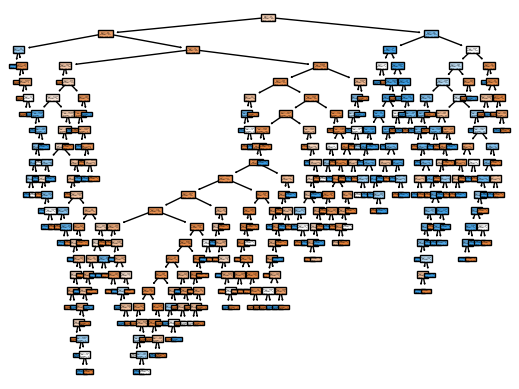

In [14]:
tree.plot_tree(model.fit(X, y), filled=True)
plt.savefig("tree.png")
plt.show()

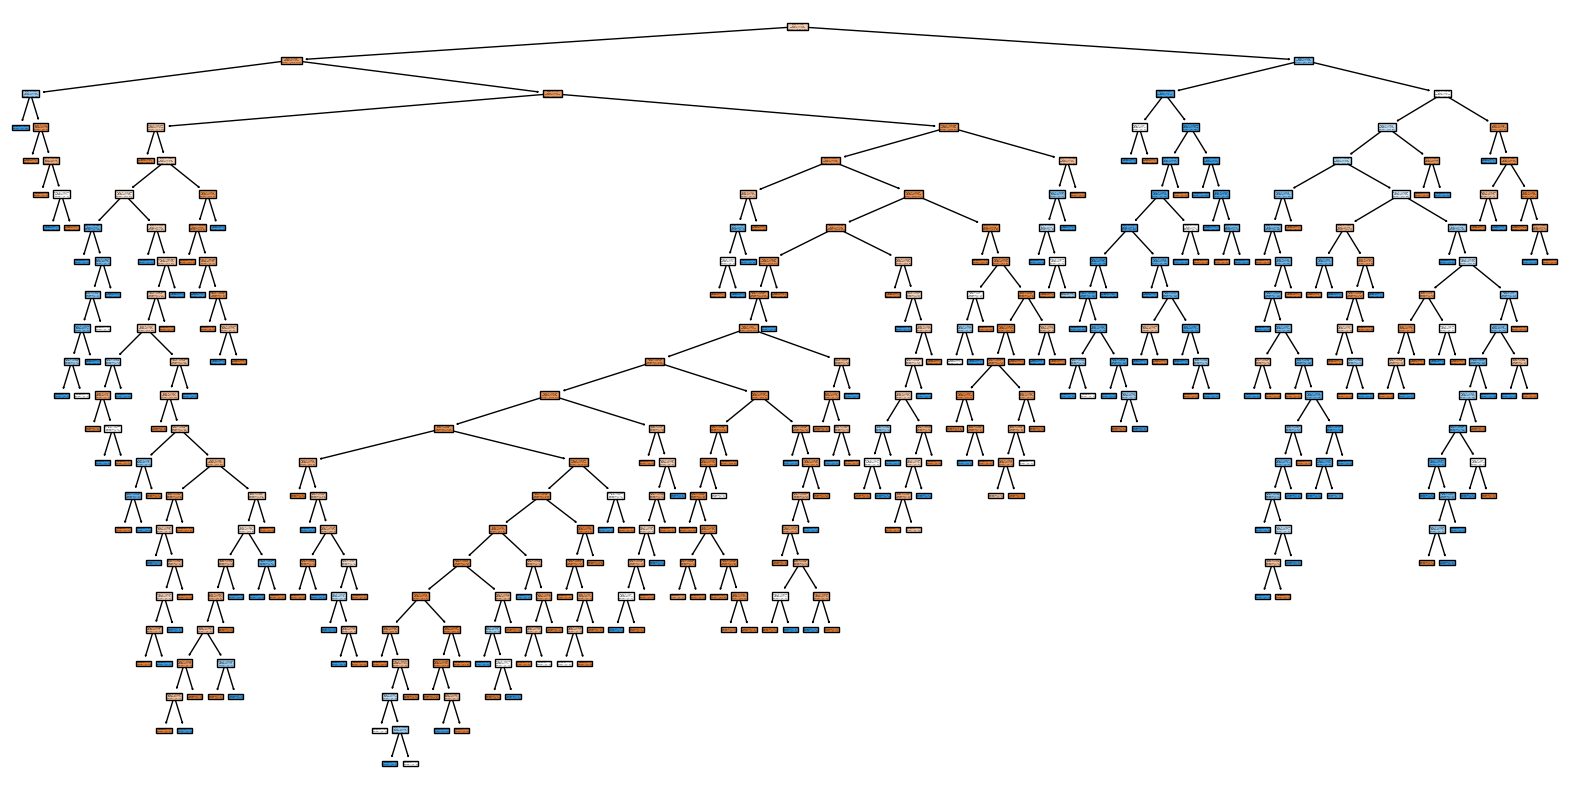

In [15]:
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X, y), filled=True)
plt.savefig("decision_tree.pdf", format="pdf", dpi=300)
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

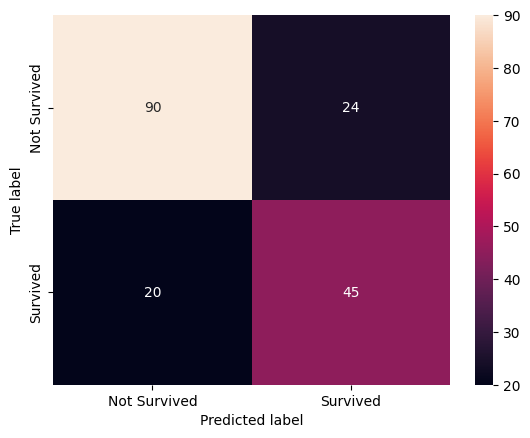

In [17]:
ax = sns.heatmap(cm, annot=True)
tick_labels = ["Not Survived", "Survived"]
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)
plt.ylabel("True label")
plt.xlabel("Predicted label")


# K Nearest Neighbours (KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[101,  13],
       [ 37,  28]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

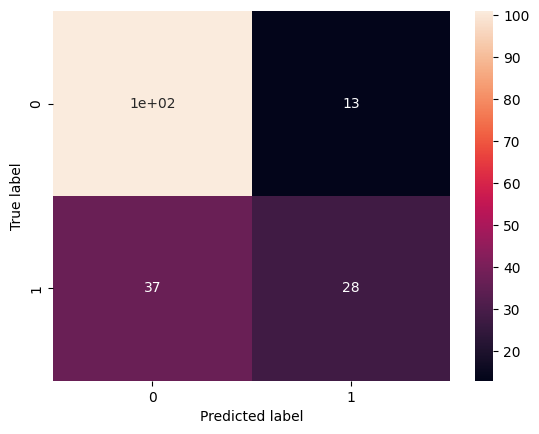

In [19]:
ax = sns.heatmap(cm, annot=True)
plt.ylabel("True label")
plt.xlabel("Predicted label")


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

[[93 21]
 [20 45]]
Precision Score: 0.6818181818181818
Recall Score: 0.6923076923076923
F1 Score: 0.6870229007633587


# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

[[96 18]
 [25 40]]
Precision Score: 0.6896551724137931
Recall Score: 0.6153846153846154
F1 Score: 0.6504065040650407


C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM: Support Vector Machine

In [24]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

[[101  13]
 [ 51  14]]
Precision Score: 0.5185185185185185
Recall Score: 0.2153846153846154
F1 Score: 0.30434782608695654


# NAIVE Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

[[93 21]
 [25 40]]
Precision Score: 0.6557377049180327
Recall Score: 0.6153846153846154
F1 Score: 0.634920634920635


In [27]:
models = [
    ("Random Forest", RandomForestClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("Support Vector Machine", SVC()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB())
]

In [30]:
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Accuracy - {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

Random Forest: Accuracy - 0.83 (+/- 0.04)
Decision Tree: Accuracy - 0.78 (+/- 0.03)
Logistic Regression: Accuracy - 0.80 (+/- 0.02)


C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Support Vector Machine: Accuracy - 0.69 (+/- 0.02)
K-Nearest Neighbors: Accuracy - 0.73 (+/- 0.04)
Naive Bayes: Accuracy - 0.80 (+/- 0.02)


In [31]:
# Another way
# Defining models to be evaluated
names = ["Logistic Regression", "KNN", "Random Forest", "SVM"]
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC()]

# Performing K-fold cross-validation for each model
k = 10
for name, model in zip(names, models):
    cv_score = cross_val_score(model, X_train, y_train, cv=k)
    print(f"{name} CV accurancy: {np.mean(cv_score):.3f} +/- {np.std(cv_score):.3f}")

C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Logistic Regression CV accurancy: 0.799 +/- 0.033
KNN CV accurancy: 0.737 +/- 0.046
Random Forest CV accurancy: 0.833 +/- 0.044
SVM CV accurancy: 0.688 +/- 0.035


Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.80
